<a href="https://colab.research.google.com/github/2303A51172/AIML-2025BT17-18/blob/main/AIML_A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary packages


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


1.Load the dataset

Assuming lending_data.csv is the dataset file (replace with the actual file path)


In [5]:
data = pd.read_csv('lending_data.csv')


2.Perform the Data and Exploratory Analysis
Checking data types


In [6]:
print(data.dtypes)


credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


Generate a summary of the dataset


In [7]:
print(data.describe(percentiles=[.25, .5, .75, .9]))


       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
90%         1.000000     0.156500   659.370000       11.675457    22.000000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std  

List the names of columns/features


In [8]:
print(data.columns)


Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


Display count of credit approvals


In [9]:
print(data['credit.policy'].value_counts())


credit.policy
1    7710
0    1868
Name: count, dtype: int64


Generate an lmplot to check trend between 'not.fully.paid' and 'credit.policy'



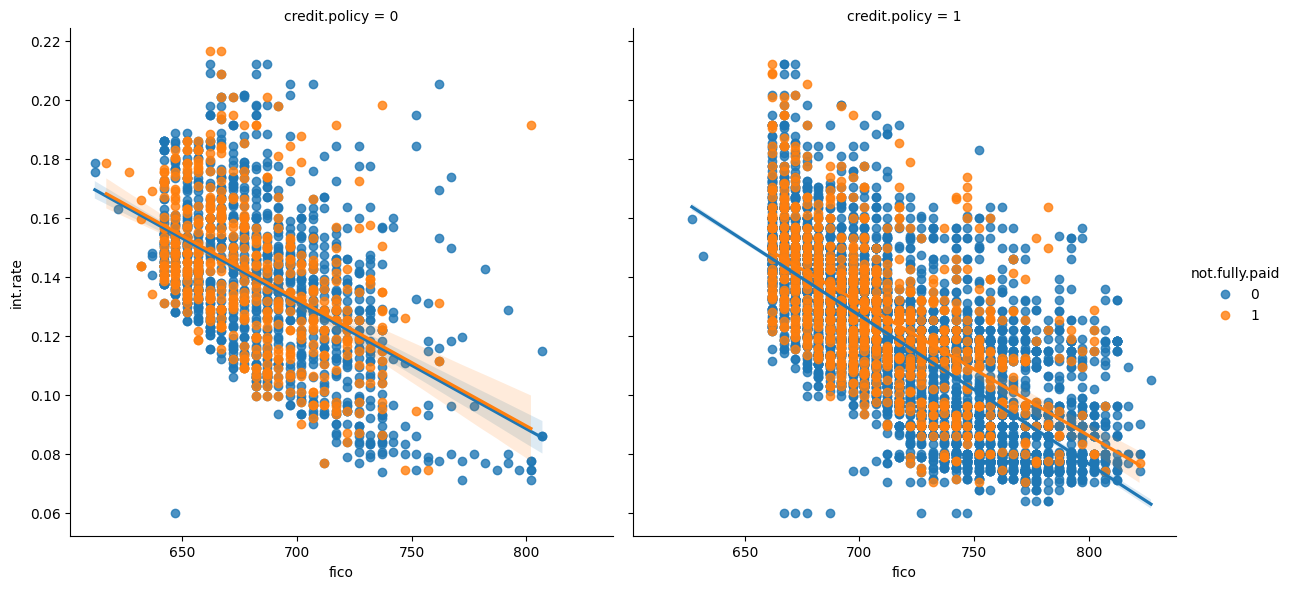

In [18]:
sns.lmplot(x='fico', y='int.rate', hue='not.fully.paid', col='credit.policy', data=data, height=6)
plt.show()


3.Categorize the features and fit the data

Convert categorical 'purpose' column using get_dummies


In [11]:
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)


4.Model training and fitting
Define features (X) and target (Y)


In [12]:
X = data.drop('not.fully.paid', axis=1)
Y = data['not.fully.paid']


Split the data into training and testing sets


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



Apply RandomForestClassifier


In [14]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)


RandomForestClassifier()

5.Evaluate the classification quality
Predictions


In [15]:
predictions = rfc.predict(X_test)


Generate confusion matrix


In [16]:
cm = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[2394   14]
 [ 456   10]]


Generate classification report


In [17]:
cr = classification_report(Y_test, predictions)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.42      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.77      0.84      0.77      2874

